# Part 2: Introduction to Quantum Computation using Linear Optics (Perceval)

In [2]:
from perceval.components import BS, PERM, Port, PS
from perceval.utils import Encoding
import perceval as pcvl
import numpy as np
from perceval.algorithm import Analyzer


Dual Rail Encoding

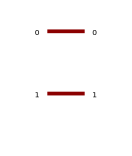

In [ ]:
qc = pcvl.Circuit(2, "Circuit")

pcvl.pdisplay(qc)


In [11]:
pcvl.pdisplay(qc.U)

<IPython.core.display.Math object>

Phase shifter

https://perceval.quandela.net/docs/v0.13/components.html#phase-shifter

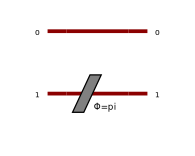

In [44]:
phase = pcvl.Circuit(2, "Phase")
phase.add(1, PS(phi=np.pi))
pcvl.pdisplay(phase)

In [9]:
pcvl.pdisplay(phase.U)

<IPython.core.display.Math object>

Beam Splitter

https://perceval.quandela.net/docs/v0.13/components.html#beam-splitter

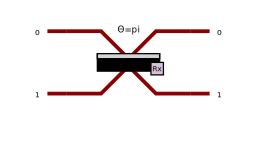

In [ ]:
beamsplitter = BS(theta=2*np.pi/2)
pcvl.pdisplay(beamsplitter)

In [13]:
pcvl.pdisplay(beamsplitter.U)

<IPython.core.display.Math object>

Permutation

https://perceval.quandela.net/docs/v0.13/components.html#permutation

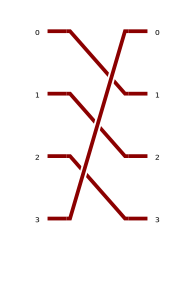

In [46]:
perm = pcvl.Circuit(4, "Permutation")
# Normal order (0, 1, 2, 3)
perm.add(0, PERM([1, 2, 3, 0]))
pcvl.pdisplay(perm)

X Gate

The Rx beam splitter convention unitary is $U = \begin{bmatrix} \cos(\theta/2) & i \sin(\theta/2) \\ i \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$

In [47]:
x = pcvl.Circuit(2, "X Gate")  // BS.Rx(theta=2*np.pi/2, phi_tr=-np.pi/2) 

# x.add(0, BS.Ry(theta=np.pi, phi_tr=np.pi))

pcvl.pdisplay(x)
pcvl.pdisplay(x.U)

<IPython.core.display.Math object>

Y Gate

The Ry beam splitter convention unitary is $U = \begin{bmatrix} \cos(\theta/2) & - \sin(\theta/2) \\  \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$

In [37]:
y = (pcvl.Circuit(2, "Y Gate")
    .add(0, BS.Ry(2*np.pi/2, phi_tr=np.pi)))


pcvl.pdisplay(y)
pcvl.pdisplay(y.U)

<IPython.core.display.Math object>

Z Gate

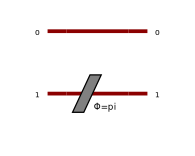

In [54]:
z = pcvl.Circuit(2, "Z Gate")
z.add(1, PS(np.pi))
pcvl.pdisplay(z)

In [55]:
pcvl.pdisplay(z.U)

<IPython.core.display.Math object>

H Gate

The H beam splitter convention unitary is $U = \begin{bmatrix} \cos(\theta/2) &  \sin(\theta/2) \\  \sin(\theta/2) & - \cos(\theta/2) \end{bmatrix}$

In [32]:
H = pcvl.Circuit(2, "H Gate")
H.add(0, BS.H())

pcvl.pdisplay(H)
pcvl.pdisplay(H.U)

<IPython.core.display.Math object>

Backend

In [34]:
backend = pcvl.SLOSBackend()

input_0 = pcvl.BasicState([1, 0])
input_1 = pcvl.BasicState([0, 1])
                            

Single Qubit Gates Test

In [74]:
# Test X gate
backend.set_circuit(x)
backend.set_input_state(input_1)
backend.evolve()

|1,0>

In [75]:
# Test Y gate
backend.set_circuit(y)
backend.set_input_state(input_1)
backend.evolve()

|1,0>

In [76]:
# Test Z gate
backend.set_circuit(z)
backend.set_input_state(input_1)
backend.evolve()

-1*|0,1>

In [77]:
# Test H gate
backend.set_circuit(H)
backend.set_input_state(input_0)
backend.evolve()

0.707*|1,0>+0.707*|0,1>

# KLM Protocol

NS Gate

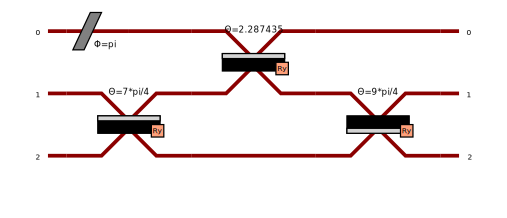

In [48]:
U = np.array([[ 1-np.sqrt(2),              2**-0.25,             (3/np.sqrt(2) - 2)**0.5],
              [ 2**-0.25,                   0.5,                        0.5-np.sqrt(0.5)],
              [ (3/np.sqrt(2) - 2)**0.5,     0.5-np.sqrt(0.5),          np.sqrt(2)-0.5]])
NS = pcvl.Circuit.decomposition(U, BS.Ry(theta=pcvl.P('theta'), phi_tr=0), phase_shifter_fn=PS, inverse_v=True)

pcvl.pdisplay(NS)

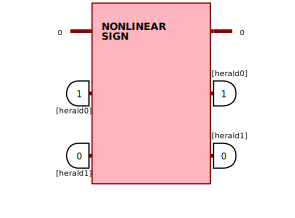

In [49]:
NS = (pcvl.Circuit(3, name="Nonlinear Sign")
           .add(0, PS(phi=np.pi))
           .add(1, BS.Ry(theta=2*np.pi/8))
           .add(0, BS.Ry(theta=2*0.364056*np.pi))
           .add(1, BS.Ry(theta=2*1.875*np.pi)))

pcvl.pdisplay(NS)

NS_P = pcvl.Processor("SLOS", NS)
NS_P.add_herald(1, 1)
NS_P.add_herald(2, 0)
pcvl.pdisplay(NS_P)

CZ 1/16

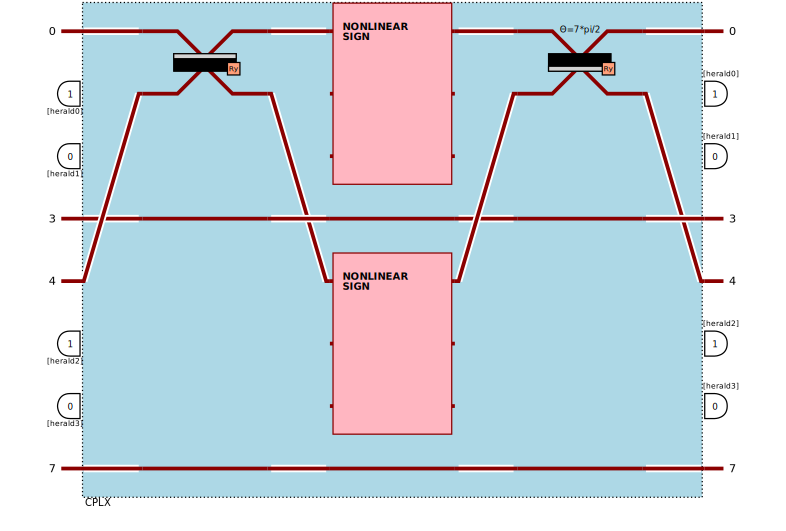

In [61]:
KLM_CZ = (pcvl.Circuit(8)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, BS.Ry(np.pi/2), merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, NS, merge=False)
              .add(4, NS, merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, BS.Ry(-np.pi/2), merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7])))
KLM_CZ_P = pcvl.Processor("SLOS", KLM_CZ)
KLM_CZ_P.add_herald(1, 1)\
            .add_herald(2, 0)\
            .add_herald(5, 1)\
            .add_herald(6, 0)
pcvl.pdisplay(KLM_CZ_P, recursive=True)

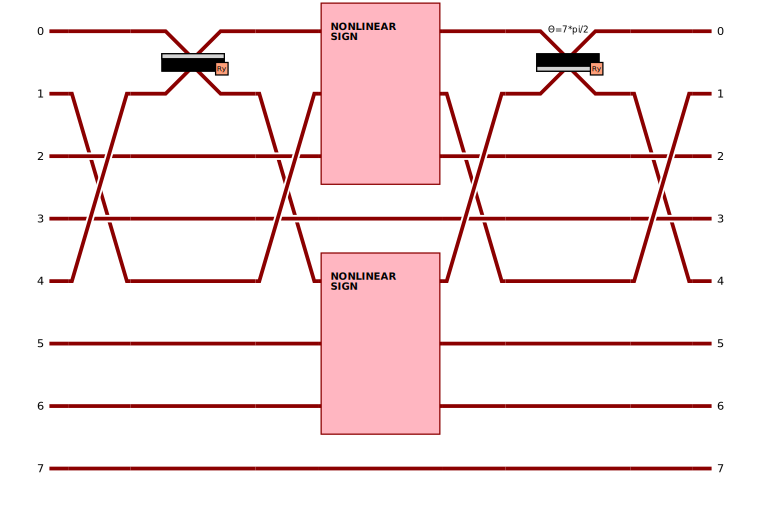

In [59]:
pcvl.pdisplay(KLM_CZ, recursive=False)

CNOT 1/16

In [ ]:
KLM_CX = pcvl.Processor("SLOS",8)
KLM_CX.add(2,BS.H())
KLM_CX.add(0, KLM_CZ_P)
KLM_CX.add(2,BS.H())

state_00 = pcvl.BasicState([0, 1, 0, 1])
state_01 = pcvl.BasicState([0, 1, 1, 0])
state_10 = pcvl.BasicState([1, 0, 0, 1])
state_11 = pcvl.BasicState([1, 0, 1, 0])
analyser_cz = Analyzer(KLM_CX, [state_00,state_01,state_10,state_11] ,[state_00, state_01, state_10, state_11]) #0,1,0,1,1,0,1,0

#pcvl.pdisplay(pcvl.catalog["klm cnot"].build_circuit().U)

pcvl.pdisplay(analyser_cz)

,"|0,1,0,1>","|0,1,1,0>","|1,0,0,1>","|1,0,1,0>"
"|0,1,0,1>",1,0,0,0
"|0,1,1,0>",0,1,0,0
"|1,0,0,1>",0,0,0,1
"|1,0,1,0>",0,0,1,0
